200


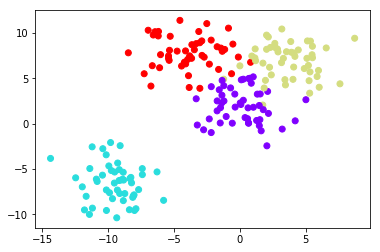

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.datasets import make_blobs
import numpy as np
from scipy.spatial import distance


# This program is a simulation of the K-Means Algorithm in Machine Learning.

# Kmeans is used to cluster data that does not have any labels. 
# K-Means is one of the most popular "clustering" algorithms. 
# K-means stores k centroids that it uses to define clusters. 
# A point is considered to be in a particular cluster if it is closer 
# to that cluster's centroid than any other centroid.

# More info about the mathematics and about the algorithm as:
# https://brilliant.org/wiki/k-means-clustering/

# Only works with k=4



# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)
# A is
A, B = data
plt.scatter(A[:,0], A[:,1], c=B, cmap='rainbow')
print(A.shape[0])

In [111]:
# Dictionary for starting centoroids
centroid = { 
    'k1': np.array([-5,0]),
    'k2': np.array([0,-5]),
    'k3': np.array([5,10]),
    'k4': np.array([-10,-2])
}
# Copy for Visualization
centroid_copy = centroid.copy()

# Loop for updating centroid
for _ in range(100):
    
    # 1-D Arrays with the same number of rows as the data array
    distances = {
        'k1': np.empty((A.shape[0])),
        'k2': np.empty((A.shape[0])),
        'k3': np.empty((A.shape[0])),
        'k4': np.empty((A.shape[0]))
    }


    # Initialized groups for each cluster
    clust_groups = {
        'k1': [],
        'k2': [],
        'k3': [],
        'k4': []
    }
    
    # Finds the euclidian distances from each point in the data to the centroid
    for k in distances:
        for i, val in enumerate(A):
            distances[k][i] = distance.euclidean(centroid[k], val)
            
            
    # For each data point, this loop finds the minimum distances to the given point and adds the point to a cluster group
    for en_pairs, dist_k1, dist_k2, dist_k3, dist_k4 in zip(enumerate(A), distances['k1'], distances['k2'], distances['k3'], distances['k4']):
        index = np.argmin((dist_k1, dist_k2, dist_k3, dist_k4))
        if index == 0:
            clust_groups['k1'].append(A[en_pairs[0]])                                 
        if index == 1:
            clust_groups['k2'].append(A[en_pairs[0]])
        if index == 2:
            clust_groups['k3'].append(A[en_pairs[0]])
        if index == 3:
            clust_groups['k4'].append(A[en_pairs[0]])
        
    # Updates each centroid with the average distances for EACH cluster
    # Udating is done by taking the sum of x values in each cluster and dividing by the length of the group, same with y
    new_centroid_k1 = np.array([np.array(clust_groups['k1'])[:,0].sum()/len(np.array(clust_groups['k1'])), np.array(clust_groups['k1'])[:,1].sum()/len(np.array(clust_groups['k1']))])
    new_centroid_k2 = np.array([np.array(clust_groups['k2'])[:,0].sum()/len(np.array(clust_groups['k2'])), np.array(clust_groups['k2'])[:,1].sum()/len(np.array(clust_groups['k2']))])
    new_centroid_k3 = np.array([np.array(clust_groups['k3'])[:,0].sum()/len(np.array(clust_groups['k3'])), np.array(clust_groups['k3'])[:,1].sum()/len(np.array(clust_groups['k3']))])
    new_centroid_k4 = np.array([np.array(clust_groups['k4'])[:,0].sum()/len(np.array(clust_groups['k4'])), np.array(clust_groups['k4'])[:,1].sum()/len(np.array(clust_groups['k4']))])


    # Udaate the centroid and reiterate
    centroid['k1'] = new_centroid_k1
    centroid['k2'] = new_centroid_k2
    centroid['k3'] = new_centroid_k3
    centroid['k4'] = new_centroid_k4

    
#New Cluster Points
print(*centroid.values())

[-4.13591321  7.95389851] [-0.03183854  2.07689723] [ 3.66465568  6.97762652] [-9.46941837 -6.56081545]


In [112]:
# For visualiation 
x=[]
y=[]
for i in centroid.values():
    x.append(i[0])
    y.append(i[1])
    
xc = []
yc = []
for i in centroid_copy.values():
    xc.append(i[0])
    yc.append(i[1])

-5 0 -4.13591321208 7.95389851393


Text(0.5,1,'K Means from Scratch')

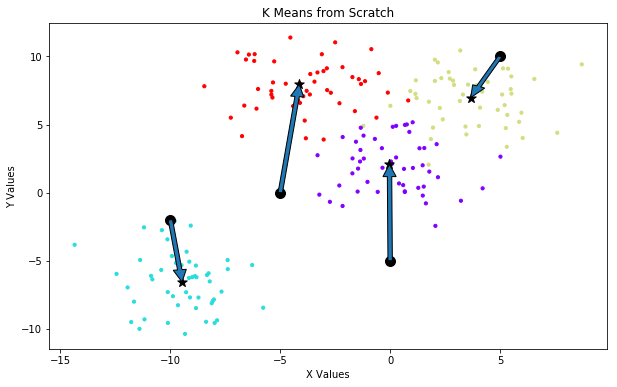

In [113]:

plt.figure(figsize=(10,6))
print(xc[0],yc[0], x[0], y[0])
plt.scatter(A[:,0], A[:,1], c=B, cmap='rainbow', s=10)
plt.scatter(x,y, c='black', marker='*',s=100)
plt.scatter(xc,yc, c='black', s=100)
plt.arrow(xc[0],yc[0], x[0]-xc[0], y[0]-yc[0], width=.2, length_includes_head=True)
plt.arrow(xc[1],yc[1], x[1]-xc[1], y[1]-yc[1], width=.2, length_includes_head=True)
plt.arrow(xc[2],yc[2], x[2]-xc[2], y[2]-yc[2], width=.2, length_includes_head=True)
plt.arrow(xc[3],yc[3], x[3]-xc[3], y[3]-yc[3], width=.2, length_includes_head=True)

plt.xlabel("X Values")
plt.ylabel('Y Values')
plt.title('K Means from Scratch')

In [114]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

kmeans.fit(A)

# Centroid Points found from sklearn
print(kmeans.cluster_centers_)

[[-9.46941837 -6.56081545]
 [-0.0123077   2.13407664]
 [ 3.71749226  7.01388735]
 [-4.13591321  7.95389851]]
